In [2]:
import numpy as np
import cv2
import os
import tqdm
import imageio as imio
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def visualize(image):
    plt.figure(figsize = (10,10))
    plt.axis('off')
    plt.imshow(image)

In [4]:
img = imio.v3.imread("./Smoke/Smoke1/smoke_0083.jpg")
object_inds = np.where(img > 10)
xs = min(object_inds[1])
ys = min(object_inds[0])
xf = max(object_inds[1])
yf = max(object_inds[0])
img = img[ys: yf, xs: xf]
#visualize(img)

In [5]:
img.mean()

9.757628878425692

In [58]:
alpha = np.max(img, axis=-1).astype(np.float64)
r = img[..., 0].astype(np.float64) / (alpha + 1e-05)
g = img[..., 1].astype(np.float64) / (alpha + 1e-05)
b = img[..., 2].astype(np.float64) / (alpha + 1e-05)
if img.mean() < 50:
        color = (np.dstack([r, g, b]) * 64).astype(np.uint8)
        alpha = np.clip(alpha.astype(np.uint8)*3, 0, 255)
else:
    color = (np.dstack([r, g, b]) * 255).astype(np.uint8)
    alpha = alpha.astype(np.uint8)
result = np.dstack([color, alpha])
result = img

In [6]:
alpha = np.max(img, axis=-1).astype(np.float64)
r = img[..., 0].astype(np.float64) / (alpha + 1e-05)
g = img[..., 1].astype(np.float64) / (alpha + 1e-05)
b = img[..., 2].astype(np.float64) / (alpha + 1e-05)
color = (np.dstack([r, g, b]) * 64).astype(np.uint8)
alpha = np.clip(alpha.astype(np.uint8)*3, 0, 255)  
result = np.dstack([color, alpha])

In [7]:
alpha.min()

0

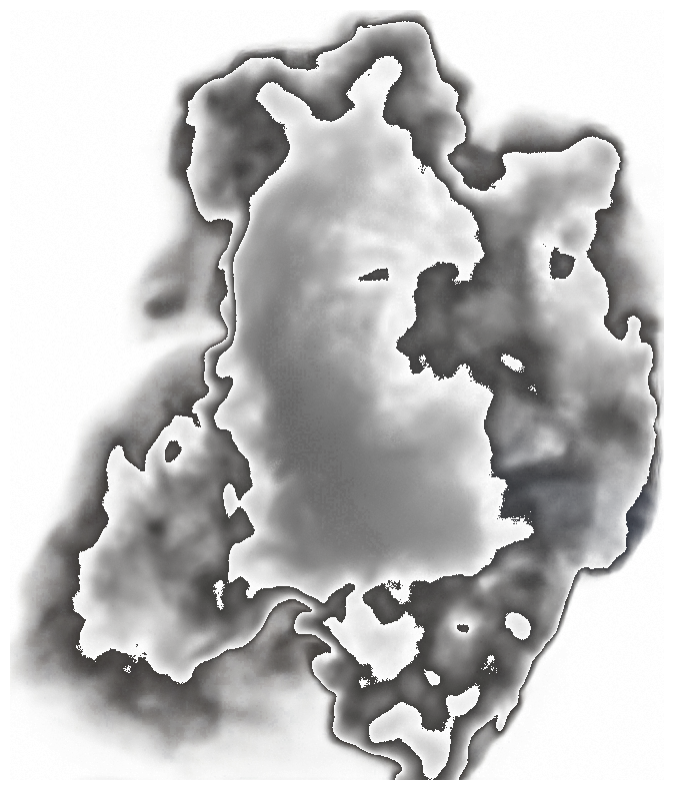

In [66]:
visualize(result)

In [8]:
bg = imio.v3.imread("./0028.jpg") #np.zeros((256, 256, 3), dtype=np.uint8) #
cbg = Image.fromarray(bg)
ctp = Image.fromarray(result)
cbg.paste(ctp, (600, -200), ctp)
cbg = np.array(cbg)[..., :3]

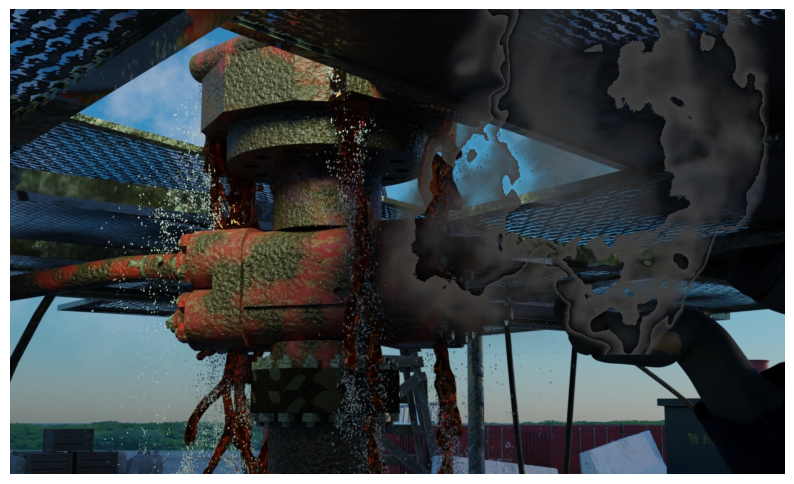

In [68]:
visualize(cbg)